In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()




,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df.Gender = le.fit_transform(df.Gender)


df.head()

In [ ]:
## X and y split

X =df.drop(columns =['Purchased'],axis =1)


X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


In [ ]:

y =df.Purchased
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:


from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()


scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
scaled_x.head()

,User ID,Gender,Age,EstimatedSalary
0,0.232636,1.0,0.023810,0.029630
1,0.982732,1.0,0.404762,0.037037
2,0.409926,0.0,0.190476,0.207407
3,0.147083,0.0,0.214286,0.311111
4,0.954801,1.0,0.023810,0.451852


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 1)


## Model building

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)
y_test

398    0
125    0
328    1
339    1
172    0
      ..
347    1
41     0
180    0
132    0
224    0
Name: Purchased, Length: 80, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

accuracy_score(y_test,pred)

0.8125

In [ ]:
confusion_matrix(y_test,pred) # how many correct predictions we got and how many we got wrong.

array([[42,  6],
       [ 9, 23]])

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,42,6
1,9,23


In [ ]:
# (58+16)/70 - accuracy score

In [ ]:
# classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.79      0.72      0.75        32

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



In [ ]:
# precision- out of all predictions how many are really positive - vertically - 64 16

#                                  precision of 1 - 16/16 - 1
#                                  precision of 0 -  58/64 - 0.91

# Recall- of all actual cases , how many are predicted positively - horizontally

#                                  recall of 1 - 16/22 - 0.72
#                                  recall of 0 - 58/58 = 1

# precision = TP / (TP + FP)
# recall    = TP   / (TP + FN)

In [ ]:
# f1 score

# 2 * precision * recall/( Precision + Recall)

In [ ]:
2 * 1 * 0.73/(1.73 )

0.8439306358381503

In [ ]:
# ROC-AUC Score

probability = model.predict_proba(x_test)[:,1] # considering only the 1s and calculating the probability

probability

array([0.13812043, 0.30745602, 0.48796326, 0.63137153, 0.21774439,
       0.29535878, 0.02515917, 0.7547451 , 0.06428966, 0.88846854,
       0.24342054, 0.38085798, 0.26238899, 0.87175974, 0.80842706,
       0.94453231, 0.8965732 , 0.08557201, 0.1722571 , 0.94004454,
       0.39723046, 0.73666301, 0.81086267, 0.46634682, 0.32311467,
       0.02939082, 0.79213601, 0.66554508, 0.55927629, 0.86025748,
       0.23465377, 0.04572476, 0.06152843, 0.83855909, 0.15631568,
       0.19878611, 0.0229306 , 0.26556306, 0.42494964, 0.01680489,
       0.86977205, 0.91751301, 0.4681951 , 0.07182728, 0.76418099,
       0.36968421, 0.44035668, 0.77657777, 0.38304266, 0.59166922,
       0.06150345, 0.24164665, 0.48465336, 0.34006193, 0.46139573,
       0.27526573, 0.77944922, 0.22163306, 0.91476554, 0.78039495,
       0.14608144, 0.09312528, 0.55965075, 0.18579591, 0.41158427,
       0.67611572, 0.04876905, 0.43218674, 0.7755615 , 0.23000373,
       0.69574086, 0.15719349, 0.51910717, 0.37341867, 0.07559

In [ ]:
# ROC-AUC Curve
# ROC is a probability curve
# Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,probability)
roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

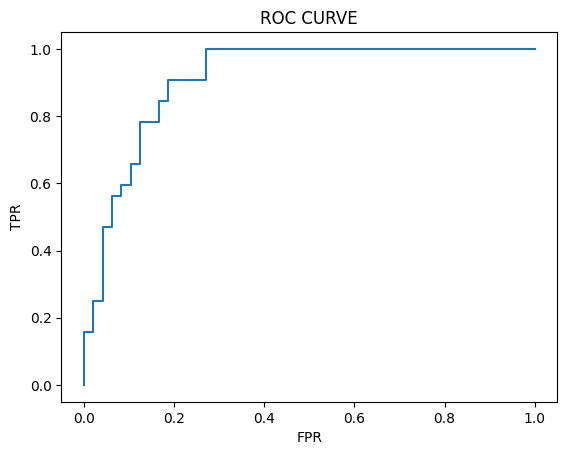

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [ ]:
# AUC Score

roc_auc_score(y_test,probability)  # area under the curve

0.9108072916666667